<a href="https://colab.research.google.com/github/kkmax-develop/FruitDiscrimination/blob/master/Sample_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# GPUが割り当てられているかチェック
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

### **ライブラリのインポート**

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

#画像認識関連ライブラリ
from tensorflow import keras
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, Activation, add, Add, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, Model

### **データの前処理**

ImageDataGeneratorクラスのインスタンスを作成。各引数の意味は公式ドキュメントを参照。

https://keras.io/ja/preprocessing/image/

In [3]:
#データ拡張。trainデータとvalidationデータは9：1で設定。
datagen = image.ImageDataGenerator(
            featurewise_center = False,
            samplewise_center = False,
            featurewise_std_normalization = False,
            samplewise_std_normalization = False,
            zca_whitening = False,
            rotation_range = 30,
            width_shift_range = 0.3,
            height_shift_range = 0.3,
            horizontal_flip = True,
            vertical_flip = False,
            validation_split = 0.1
        )

In [4]:
# ImageDataGeneratorを使用してデータの読み込みと拡張
batch_size = 128
IMG_WIDTH = 100
IMG_HEIGHT = 100
CHANNELS = 3
train_dir = "/content/drive/My Drive/Colab Notebooks/FruitDiscrimination/data/training"
TARGET = ["Apple Golden 1","Avocado","Banana","Blueberry","Cherry 1","Grape Pink","Kaki",
         "Lemon","Mango","Onion Red","Peach","Strawberry","Tomato 1"]

train_generator = datagen.flow_from_directory(
            train_dir,
            target_size=(IMG_WIDTH,IMG_HEIGHT),
            batch_size=batch_size,
            class_mode='categorical',
            shuffle=True,
            classes=TARGET,
            subset = "training" 
        )

Found 5841 images belonging to 13 classes.


In [5]:
# validationデータの読み込み
validation_generator = datagen.flow_from_directory(
            train_dir,
            target_size=(IMG_WIDTH,IMG_HEIGHT),
            batch_size=batch_size,
            class_mode='categorical',
            classes=TARGET,
            subset = "validation" 
        )

Found 646 images belonging to 13 classes.


### **モデル作成**

In [19]:
# CNNのモデル作成
model = Sequential()

model.add(Conv2D(32,(3,3),activation="relu",input_shape=(IMG_WIDTH,IMG_HEIGHT,CHANNELS)))
model.add(MaxPooling2D((2,2)))
 
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
 
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
 
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2),padding="SAME"))
 
model.add(Flatten())
 
model.add(Dense(512,activation="relu"))
model.add(Dense(13,activation="sigmoid"))
 
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 8, 128)        

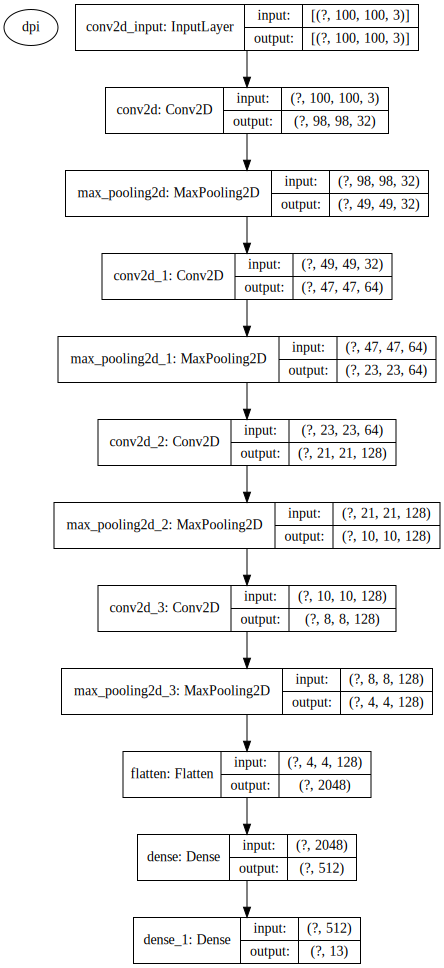

In [7]:
# 作成したモデルの可視化
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, dpi=None).create(prog='dot', format='svg'))

In [20]:
# モデルの学習方法について指定
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.RMSprop(lr=1e-4, decay = 1e-6),
              metrics=['accuracy'])
 
STEP_SIZE_TRAIN=train_generator.n // train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n  // validation_generator.batch_size
epochs = 50

# 学習 
result = model.fit_generator(train_generator,
                             steps_per_epoch=STEP_SIZE_TRAIN,
                             epochs=epochs,
                             validation_data=validation_generator,
                             validation_steps=STEP_SIZE_VALID)

Epoch 1/50
45/45 [==============================] - 30s 659ms/step - loss: 2.6765 - accuracy: 0.0967 - val_loss: 2.4753 - val_accuracy: 0.1281
Epoch 2/50
45/45 [==============================] - 29s 640ms/step - loss: 2.4002 - accuracy: 0.1252 - val_loss: 2.2274 - val_accuracy: 0.1422
Epoch 3/50
45/45 [==============================] - 29s 641ms/step - loss: 1.9660 - accuracy: 0.1831 - val_loss: 1.6238 - val_accuracy: 0.2547
Epoch 4/50
45/45 [==============================] - 29s 641ms/step - loss: 1.2985 - accuracy: 0.4896 - val_loss: 0.7221 - val_accuracy: 0.8188
Epoch 5/50
45/45 [==============================] - 29s 647ms/step - loss: 0.6211 - accuracy: 0.7949 - val_loss: 0.4899 - val_accuracy: 0.8766
Epoch 6/50
45/45 [==============================] - 29s 643ms/step - loss: 0.3516 - accuracy: 0.8848 - val_loss: 0.1383 - val_accuracy: 0.9563
Epoch 7/50
45/45 [==============================] - 29s 644ms/step - loss: 0.2861 - accuracy: 0.9184 - val_loss: 0.0537 - val_accuracy: 0.9875

In [9]:
result.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### **学習状況の可視化**

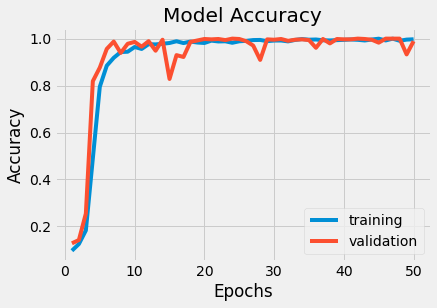

In [21]:
plt.style.use('fivethirtyeight')
plt.title('Model Accuracy')
plt.plot(range(1, epochs+1), result.history['accuracy'], label="training")
plt.plot(range(1, epochs+1), result.history['val_accuracy'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

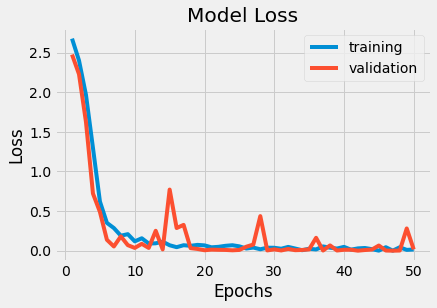

In [22]:
plt.style.use('fivethirtyeight')
plt.title('Model Loss')
plt.plot(range(1, epochs+1), result.history['loss'], label="training")
plt.plot(range(1, epochs+1), result.history['val_loss'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()